In [15]:
import tensorflow as tf
import numpy as np
import flow_pipeline_whole as fp
import new_model_whole as nm
import train_argument as arg
import time
import tqdm
import tensorboard
from datetime import datetime

데이터셋 불러오기

In [17]:
def changer(tensor):
    temp = tensor.numpy()

    for i in range(len(temp)):
        if temp[i][0] > temp[i][1]:
            if i == 0:
                concated = np.array([[1.,0.]])
            else:
                concated = np.concatenate((concated, np.array([[1.,0.]])), axis = 0)
        else:
            if i == 0:
                concated = np.array([[0.,1.]])
            else:
                concated = np.concatenate((concated, np.array([[0.,1.]])), axis=  0)
    return tf.convert_to_tensor(concated)


count = 0

logdir="logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'whole_new/{count}.h5', monitor='loss', save_best_only=True, save_weights_only=False, save_freq='epoch')

Middle Frame Prediction 학습 모델 불러오기

In [18]:
model = nm.MP_model()

In [19]:
model.compile(optimizer = 'adam', 
                loss = 
                {'Arrow_of_Time' : tf.keras.losses.BinaryCrossentropy(),
                'Motion_Irregularity' : tf.keras.losses.BinaryCrossentropy(),
                'Middle_Prediction' : tf.keras.losses.MeanAbsoluteError()
                },
                loss_weights = {'Arrow_of_Time' : 0,
                'Motion_Irregularity' : 0,
                'Middle_Prediction' : 1
                })
            

In [20]:
#callbacks.on_train_begin(logs = logs)

for epoch in range(250):
    # callbacks.on_train_begin

    dt = fp.ano_dataset()
    dt = dt.batch(6)
    dt = dt.prefetch(1)
    dt = iter(dt)

    print(f'Start {epoch} epoch')
    start = time.time()
    #callbacks.on_epoch_begin(epoch, logs = logs)
    #for step in range(arg.data_size):
    for batch in dt:
        #callbacks.on_batch_begin(step,logs = logs)
        aot_input, aot_label, moi_input, moi_label, mp_input, mp_label, name = next(dt)
        history = model.fit([aot_input, moi_input, mp_input], [aot_label, moi_label, mp_label],
        callbacks= [tensorboard_callback, checkpoint])
        count += 1
    #callbacks.on_epoch_end(epoch, logs = logs)
#callbacks.on_train_end(logs = logs)

Start 0 epoch
1/1 [==============================] - 3s 3s/step - loss: 2.2495 - Arrow_of_Time_loss: 0.6989 - Motion_Irregularity_loss: 0.6954 - Middle_Prediction_loss: 2.2495


KeyboardInterrupt: 

In [21]:
model.save('whole.h5')

In [23]:
result = model([aot_input, moi_input, mp_input])

In [24]:
_,_,mp_result = result

In [29]:
import matplotlib.pyplot as plt
import flow_vis

def check(array, index= 0):
    a = array[index,:,:,:3]
    b = array[index,:,:,3:]
    flow_color = flow_vis.flow_to_color(b)

    plt.subplot(1,2,1)
    plt.imshow(a)

    plt.subplot(1,2,2)
    plt.imshow(flow_color)


def check_input(array, index= 0):
    a = array[2,index,:,:,:3]
    b = array[2,index,:,:,3:]
    #b = []
    #for i in range(5):
    #    a.append(array[i,:,:,:3])
    #    b.append(flow_vis.flow_to_color(array[i,:,:,3:]))
    #    #flow_color = flow_vis.flow_to_color(concated[0,:,:,3:])
    
    flow_color = flow_vis.flow_to_color(b)

    plt.subplot(1,2,1)
    plt.imshow(a)

    plt.subplot(1,2,2)
    plt.imshow(flow_color)

In [65]:
aot_input, aot_label, moi_input, moi_label, mp_input, mp_label, name = next(dt)
result = model([aot_input, moi_input, mp_input])
_,_,mp_result = result

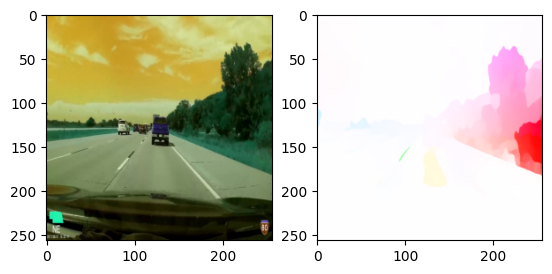

In [66]:
check_input(aot_input, index= 2)

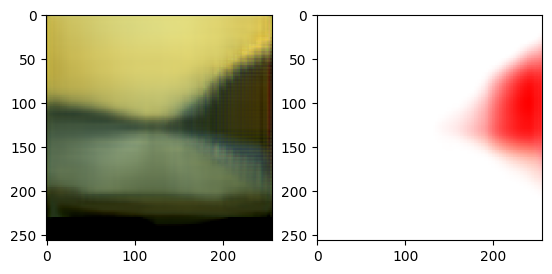

In [67]:
check(mp_result, index= 2)